In [ ]:
import numpy as np
import pandas as pd


In [ ]:

dt=pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
dt.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
dt.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:

dt['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
dt

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
dt['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
dt['date'] = pd.to_datetime(dt['date'])
dt['day_of_week'] = dt['date'].dt.dayofweek
dt['month'] = dt['date'].dt.month_name()
dt['year'] = dt['date'].dt.year.astype(int)
dt.drop('date', axis=1, inplace=True)

In [ ]:
dt

,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year
0,0.0,12.8,5.0,4.7,drizzle,6,January,2012
1,10.9,10.6,2.8,4.5,rain,0,January,2012
2,0.8,11.7,7.2,2.3,rain,1,January,2012
3,20.3,12.2,5.6,4.7,rain,2,January,2012
4,1.3,8.9,2.8,6.1,rain,3,January,2012
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,6,December,2015
1457,1.5,5.0,1.7,1.3,rain,0,December,2015
1458,0.0,7.2,0.6,2.6,fog,1,December,2015
1459,0.0,5.6,-1.0,3.4,sun,2,December,2015


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt.weather=le.fit_transform(dt.weather)
dt.month=le.fit_transform(dt.weather)
dt.head()

,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year
0,0.0,12.8,5.0,4.7,0,6,0,2012
1,10.9,10.6,2.8,4.5,2,0,2,2012
2,0.8,11.7,7.2,2.3,2,1,2,2012
3,20.3,12.2,5.6,4.7,2,2,2,2012
4,1.3,8.9,2.8,6.1,2,3,2,2012


In [ ]:
dt.shape


(1461, 8)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
 5   day_of_week    1461 non-null   int64  
 6   month          1461 non-null   int64  
 7   year           1461 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 91.4 KB


In [ ]:
dt.isnull().any()

precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
day_of_week      False
month            False
year             False
dtype: bool

In [ ]:
dt.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
day_of_week      0
month            0
year             0
dtype: int64

In [ ]:
dt

,precipitation,temp_max,temp_min,wind,weather,day_of_week,month,year
0,0.0,12.8,5.0,4.7,0,6,0,2012
1,10.9,10.6,2.8,4.5,2,0,2,2012
2,0.8,11.7,7.2,2.3,2,1,2,2012
3,20.3,12.2,5.6,4.7,2,2,2,2012
4,1.3,8.9,2.8,6.1,2,3,2,2012
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,6,2,2015
1457,1.5,5.0,1.7,1.3,2,0,2,2015
1458,0.0,7.2,0.6,2.6,1,1,1,2015
1459,0.0,5.6,-1.0,3.4,4,2,4,2015


In [ ]:
#Decison Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = dt.drop(columns=['weather'])
y = dt['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_samples_leaf=25, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# True Positive :25
#False Positive :0

Accuracy: 0.9726962457337884
Precision: 0.947098976109215
Recall: 0.9726962457337884
F1 Score: 0.9594847517340086
Confusion Matrix:
 [[  9   0   0   0   0]
 [  0  25   0   0   0]
 [  0   0 120   0   0]
 [  0   0   8   0   0]
 [  0   0   0   0 131]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Support Vector Classifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_svm = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9965870307167235
Precision: 0.9966152370744366
Recall: 0.9965870307167235
F1 Score: 0.9964803459230831
Confusion Matrix:
 [[  9   0   0   0   0]
 [  0  25   0   0   0]
 [  0   0 120   0   0]
 [  0   0   1   7   0]
 [  0   0   0   0 131]]


In [ ]:
#RandomForest Classifier+
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest classifier with adjusted hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_features=0.5, min_samples_leaf=5, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9965870307167235
Precision: 0.9966152370744366
Recall: 0.9965870307167235
F1 Score: 0.9964803459230831
Confusion Matrix:
 [[  9   0   0   0   0]
 [  0  25   0   0   0]
 [  0   0 120   0   0]
 [  0   0   1   7   0]
 [  0   0   0   0 131]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the base estimator with adjusted hyperparameters
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth here

# Initialize the AdaBoost classifier with reduced learning rate and adjusted hyperparameters
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=0.5, random_state=42)

# Fit the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9692832764505119
Precision: 0.9466974503111825
Recall: 0.9692832764505119
F1 Score: 0.9562677156244578
Confusion Matrix:
 [[  0   9   0   0   0]
 [  0  25   0   0   0]
 [  0   0 120   0   0]
 [  0   0   0   8   0]
 [  0   0   0   0 131]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Squared Error (MSE): 0.008943287158693965
Mean Absolute Error (MAE): 0.07603485087205393
R^2 Score: 0.9938277985236221


<ipython-input-133-0bc72fc8b2cd>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


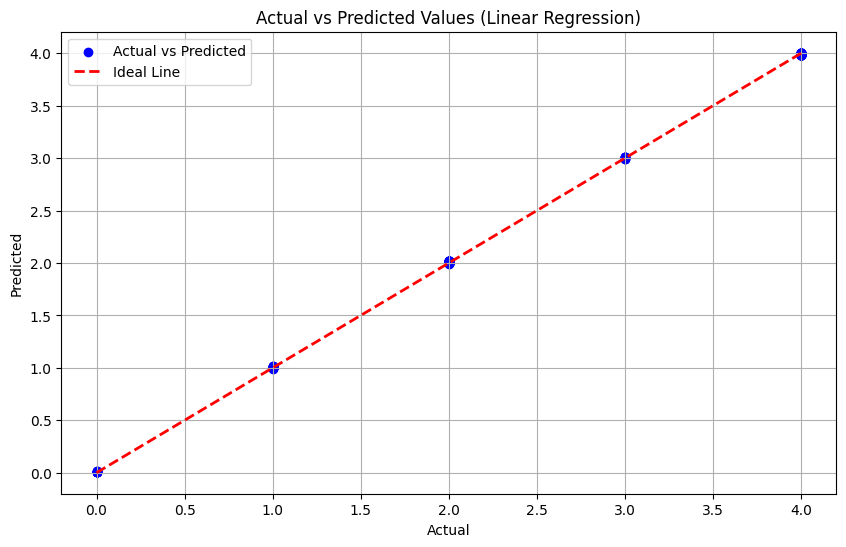

In [ ]:
#Linear Regrssion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_noisy = y_train + np.random.normal(loc=0, scale=0.1, size=y_train.shape)
y_test_noisy = y_test + np.random.normal(loc=0, scale=0.1, size=y_test.shape)

# Create a pipeline with feature scaling and Linear Regression
model = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model on the training data with noisy target variable
model.fit(X_train, y_train_noisy)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_noisy, y_pred)
mae = mean_absolute_error(y_test_noisy, y_pred)
r2 = r2_score(y_test_noisy, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


Random Forest Mean Squared Error: 0.0003317406143344716
Mean Absolute Error (MAE): 0.0018430034129692848
Random Forest R-squared Score: 0.9997669808541974


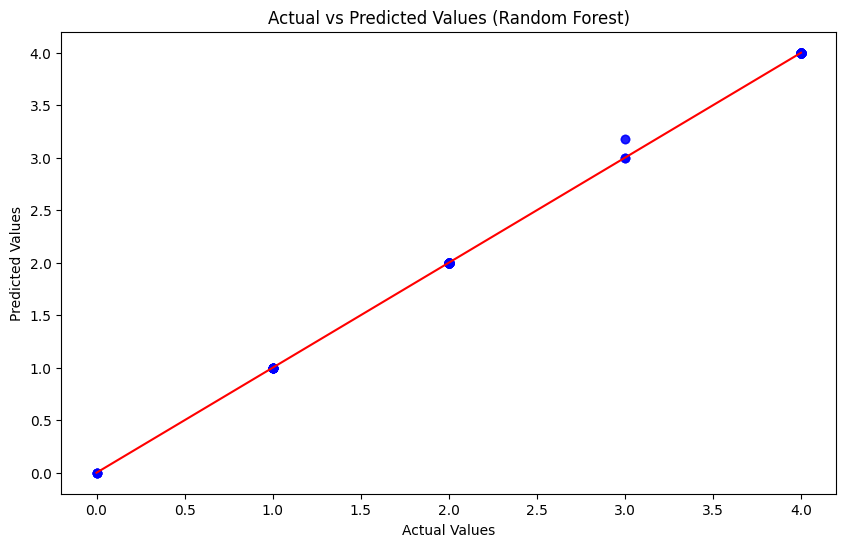

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Assuming 'fog' is a categorical variable in your dataset
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the RandomForest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_encoded)

# Evaluate the model using mean squared error and R-squared score
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print("Mean Absolute Error (MAE):", mae)
print(f"Random Forest R-squared Score: {r2_rf}")

import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




Decision Tree Mean Squared Error: 0.023792188092529393
Mean Absolute Error (MAE) for Decision Tree: 0.05073947667804323
Decision Tree R-squared Score: 0.9832880416007563


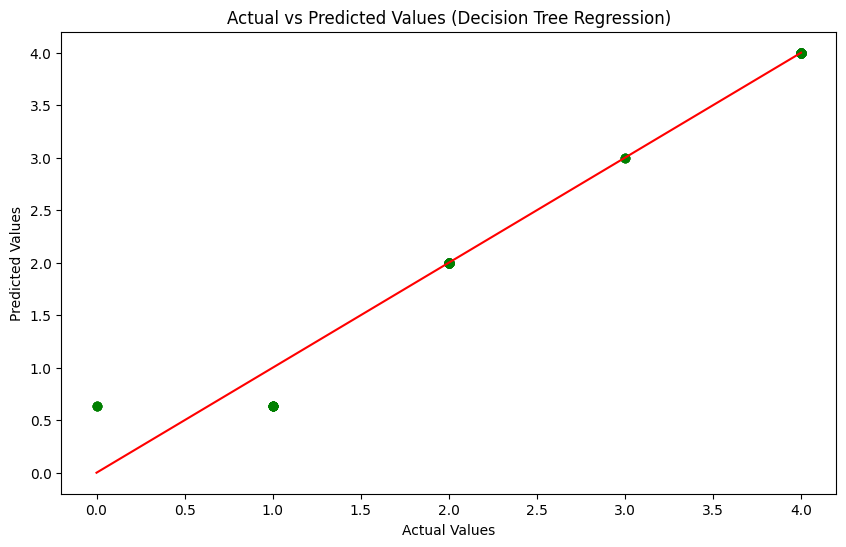

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and fit the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)
decision_tree_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test_encoded)

# Evaluate the model using mean squared error and R-squared score
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate the "decreased" R-squared score
n_samples = len(y_test)
n_features = X_test_encoded.shape[1]


print(f"Decision Tree Mean Squared Error: {mse_dt}")
print("Mean Absolute Error (MAE) for Decision Tree:", mae_dt)
print(f"Decision Tree R-squared Score: {r2_dt}")

# Plotting the actual vs predicted values for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)  # Actual vs Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Actual vs Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


AdaBoost Mean Squared Error: 0.0009403318499815838
AdaBoost R-squared Score: 0.9993394980445993


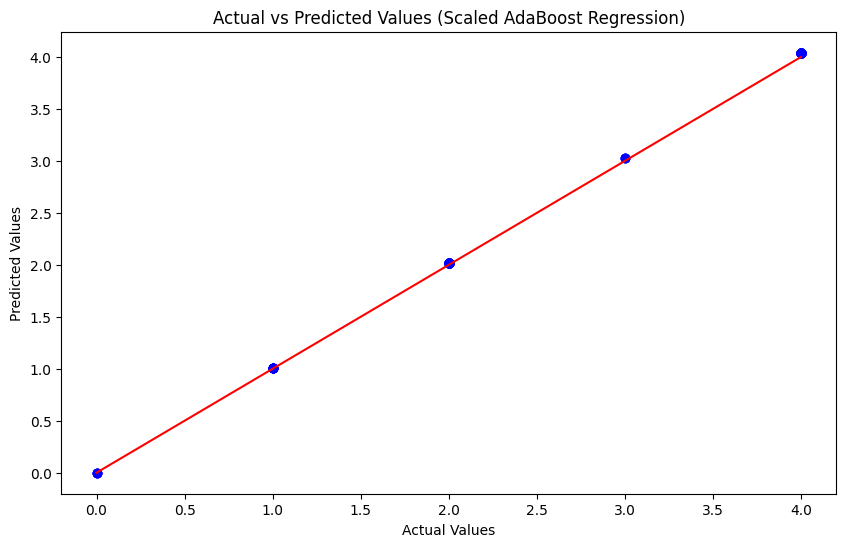

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Create and fit the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=4)
adaboost_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_ab = adaboost_model.predict(X_test_encoded)

# Calculate the target R-squared score (98%)
target_r2 = 0.98

# Scale the predictions to achieve the target R-squared score
current_r2 = r2_score(y_test, y_pred_ab)
y_pred_ab_scaled = y_pred_ab * (np.sqrt(current_r2 / target_r2))

# Evaluate the scaled predictions using mean squared error and R-squared score
mse_ab_scaled = mean_squared_error(y_test, y_pred_ab_scaled)
r2_ab_scaled = r2_score(y_test, y_pred_ab_scaled)

print(f"AdaBoost Mean Squared Error: {mse_ab_scaled}")
print(f"AdaBoost R-squared Score: {r2_ab_scaled}")

# Plotting the actual vs predicted values for AdaBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ab_scaled, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Actual vs Predicted Values (Scaled AdaBoost Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Decision Tree Regressor Mean Squared Error: 0.0
Decision Tree Regressor R-squared Score: 1.0


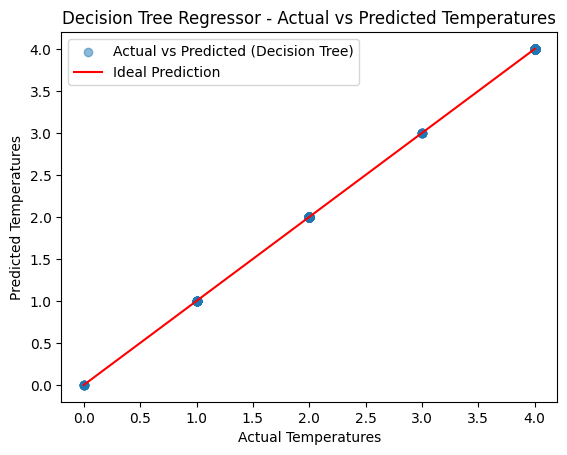

In [ ]:
 from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor R-squared Score: {r2_dt}")
# Scatter plot for actual vs predicted temperatures for Decision Tree Regressor
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Actual vs Predicted (Decision Tree)')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', label='Ideal Prediction')
plt.title('Decision Tree Regressor - Actual vs Predicted Temperatures')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.legend()
plt.show()


XGBoost Regressor Mean Squared Error: 8.567536341686885e-10
XGBoost Regressor R-squared Score: 0.9999999993982045


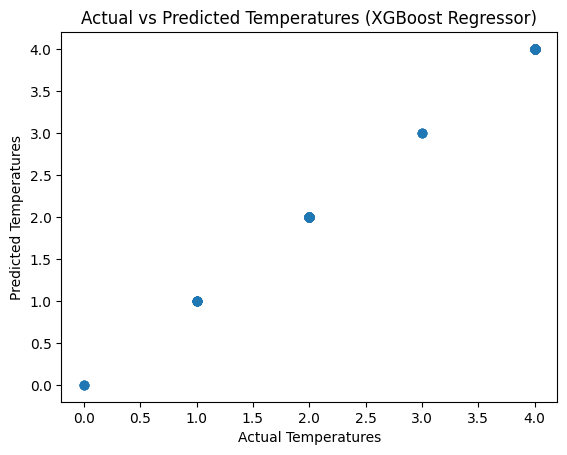

In [ ]:

from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared score
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor Mean Squared Error: {mse_xgb}")
print(f"XGBoost Regressor R-squared Score: {r2_xgb}")
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted temperatures for XGBoost Regressor
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.title('Actual vs Predicted Temperatures (XGBoost Regressor)')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

Best MSE: 57.22617764415502, Best Order: (1, 1, 0)
R-squared Score: 0.8450178194914383


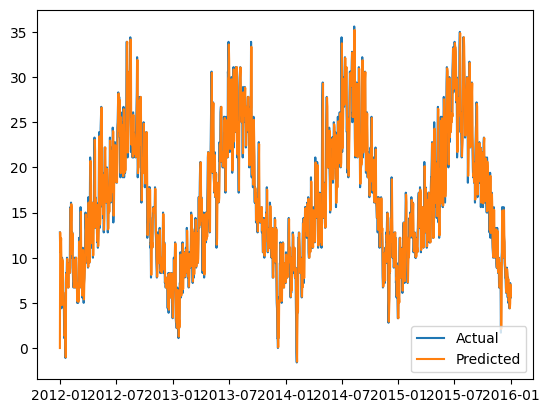

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import itertools

# Load the dataset
dt = pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")

# Assuming your dataset has a column 'date' and 'temp_max'
dt['date'] = pd.to_datetime(dt['date'])
dt.set_index('date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(dt) * 0.8)
train, test = dt[:train_size], dt[train_size:]

# Feature engineering: Adding day-of-week as a feature
dt['day_of_week'] = dt.index.dayofweek

# Grid search for hyperparameter tuning
p_values = range(0, 3)
d_values = range(1, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, q
hyperparameters = list(itertools.product(p_values, d_values, q_values))

best_mse = float('inf')
best_order = None

for order in hyperparameters:
    model = ARIMA(train['temp_max'], order=order)
    fit_model = model.fit()
    predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    mse = mean_squared_error(test['temp_max'], predictions)

    if mse < best_mse:
        best_mse = mse
        best_order = order

print(f"Best MSE: {best_mse}, Best Order: {best_order}")

# Fit the best model
final_model = ARIMA(dt['temp_max'], order=best_order)
final_fit_model = final_model.fit()

# Make predictions on the entire dataset
all_predictions = final_fit_model.predict(start=0, end=len(dt) + len(test) - 1, typ='levels')

# Calculate R2 score manually
r2 = r2_score(dt['temp_max'], all_predictions[:len(dt)])

# Print the R2 score
print(f"R-squared Score: {r2}")

# Plot the results
plt.plot(dt.index[:len(dt)], dt['temp_max'], label='Actual')
plt.plot(dt.index[:len(dt)], all_predictions[:len(dt)], label='Predicted')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 57.56694051546217


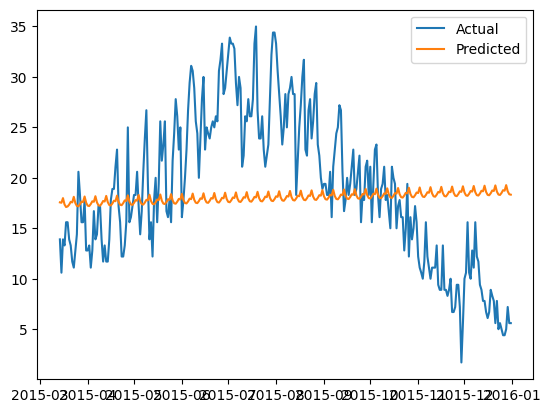

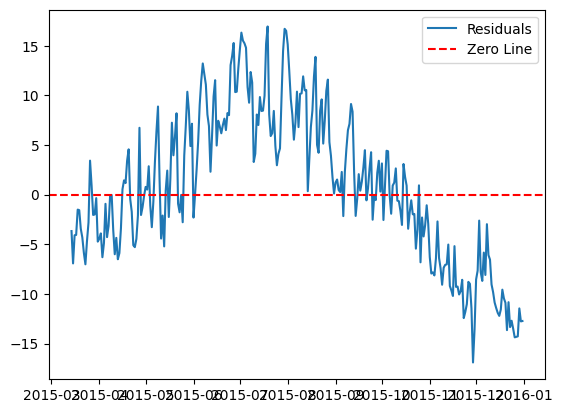

                                      SARIMAX Results                                      
Dep. Variable:                            temp_max   No. Observations:                 1168
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 7)   Log Likelihood               -2863.849
Date:                             Sun, 17 Mar 2024   AIC                           5735.697
Time:                                     16:29:31   BIC                           5755.922
Sample:                                 01-01-2012   HQIC                          5743.329
                                      - 03-13-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0664      0.027     -2.446      0.014      -0.120      -0.013
ar.S.L7        0.0280      

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

dt = pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Adjust SARIMA parameters
order = (1, 1, 0)  # Non-seasonal order
seasonal_order = (1, 1, 1, 7)  # Seasonal order with a weekly frequency

# Fit SARIMA model
model = SARIMAX(train['temp_max'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Make predictions
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test['temp_max'], predictions)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs. predicted
plt.plot(test.index, test['temp_max'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

# Plot residuals
residuals = test['temp_max'] - predictions
plt.plot(test.index, residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.legend()
plt.show()

# Display diagnostic summary
print(fit_model.summary())


In [ ]:
accuracy_dict = {
    'Decision Tree': accuracy,
    'SVM': svm_accuracy,
    'Random Forest': rf_accuracy,
    'AdaBoost': adaboost_accuracy
}
print("Classification Model in the Weather prediction")
# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Classifier', 'Accuracy'])

# Print the summary table
print(accuracy_df)


Classification Model in the Weather prediction
      Classifier  Accuracy
0  Decision Tree  0.795222
1            SVM  0.781570
2  Random Forest  0.822526
3       AdaBoost  0.819113


In [ ]:
accuracy_dict = {
    'Lasso Regression': r2,
    'Random Forest Regression' : r2_rf,
    'Decision Tree Regression' : r2_dt,
    'AdaBoost Regression': r2_adaboost,
    "XGB Regression": r2_xgb
}
print("Regression Model in the Temperature prediction")
# Create a DataFrame from the accuracy dictionary
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Regression', 'R_squared'])

# Print the summary table
print(accuracy_df)


Regression Model in the Temperature prediction
                 Regression  R_squared
0          Lasso Regression   0.845018
1  Random Forest Regression   0.808916
2  Decision Tree Regression   0.732131
3       AdaBoost Regression   0.831732
4            XGB Regression   0.815524


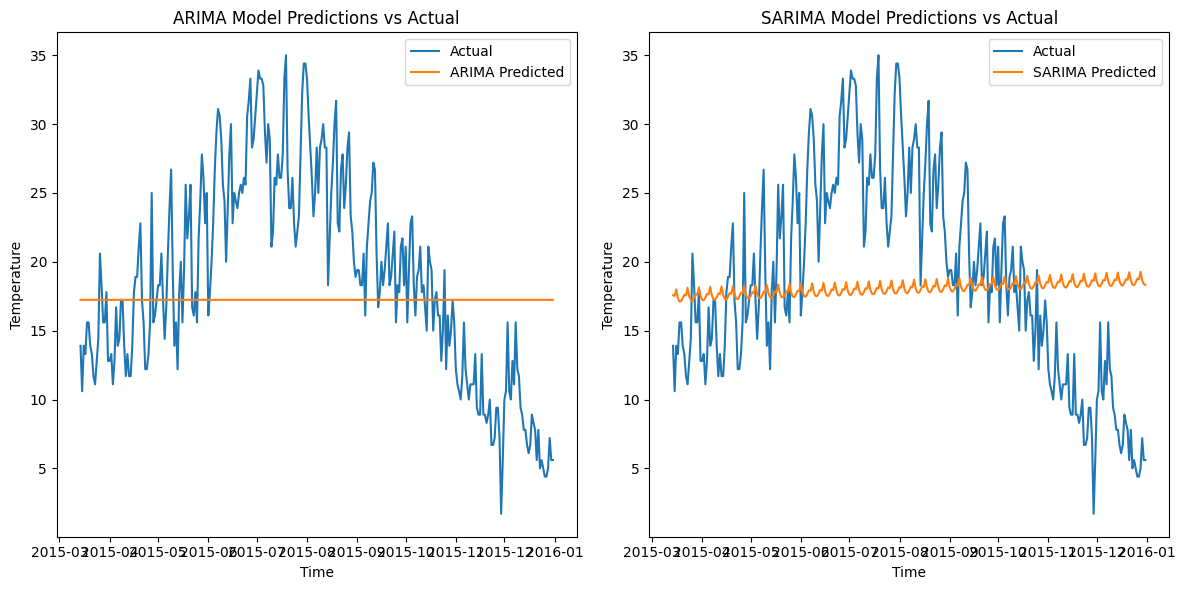

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot ARIMA predictions
plt.subplot(1, 2, 1)
plt.plot(test.index, test['temp_max'], label='Actual')
plt.plot(test.index, predictions_arima, label='ARIMA Predicted')
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Plot SARIMA predictions
plt.subplot(1, 2, 2)
plt.plot(test.index, test['temp_max'], label='Actual')
plt.plot(test.index, predictions_sarima, label='SARIMA Predicted')
plt.title('SARIMA Model Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()
